# **CREATING THE DATASET**

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)                          #Random seed ensures the values don't get changed every time you run the notebook

# Generate sample data with consistent lengths and appropriate types
data = {
    'A': np.random.randint(1, 101, size=50000),            # Area in acres
    'h': np.random.randint(1, 101, size=50000),            # Thickness in feet
    'phi': np.random.random(50000),                        # Porosity (fraction between 0 and 1)
    'Swi': np.random.random(50000),                        # Initial water saturation (fraction between 0 and 1)
    'Rf': np.random.random(50000),                         # Recovery factor (fraction between 0 and 1)
    'Bo': np.random.randint(1, 101, size=50000)            # Formation volume factor (RB/STB) > 0 to avoid division by zero
}

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate Np using the formula
Np = (7758 * df['A'] * df['h'] * df['phi'] * (1 - df['Swi']) * df['Rf']) / df['Bo']

NP = Np/10**6                                              #Changing to MM STB

df['Np(In MM STB)'] = NP

In [2]:
df.head()

,A,h,phi,Swi,Rf,Bo,Np(In MM STB)
0,52,35,0.105517,0.433784,0.751064,80,0.007920
1,93,75,0.243215,0.039028,0.849330,3,3.580554
2,15,87,0.779881,0.063515,0.773912,89,0.064297
3,72,30,0.463686,0.191548,0.127838,76,0.010566
4,61,48,0.457068,0.718298,0.759110,98,0.022655


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A              50000 non-null  int64  
 1   h              50000 non-null  int64  
 2   phi            50000 non-null  float64
 3   Swi            50000 non-null  float64
 4   Rf             50000 non-null  float64
 5   Bo             50000 non-null  int64  
 6   Np(In MM STB)  50000 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.7 MB


**IMPORTING NECESSARY LIBRARIES**

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [5]:
 from sklearn.model_selection import KFold
 from sklearn.model_selection import cross_val_score
 from sklearn.model_selection import GridSearchCV
 from sklearn.linear_model import LinearRegression
 from sklearn.linear_model import Lasso
 from sklearn.linear_model import ElasticNet
 from sklearn.tree import DecisionTreeRegressor
 from sklearn.neighbors import KNeighborsRegressor
 from sklearn.svm import SVR
 from sklearn.pipeline import Pipeline
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.ensemble import GradientBoostingRegressor
 from sklearn.ensemble import ExtraTreesRegressor
 from sklearn.ensemble import AdaBoostRegressor
 from sklearn.metrics import mean_squared_error

In [6]:
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**SPLITTING DATASET**

In [9]:
array=df.values
X=array[:,0:6]
Y=array[:,6]

validation_size =0.20
randomseed=7
xtrain,xval,ytrain,yval=train_test_split(X,Y,test_size=validation_size,random_state=randomseed)



# TESTING ALGORITHMS AND ENSEMBLE METHODS

**WITHOUT FEATURE SCALING**

In [20]:
 num_folds = 10
 seed = 7
 scoring = 'neg_mean_squared_error'

**LINEAR ALGORITHMS -**
  Linear regression,
  LASSO  regression,
  ElasticNet


In [21]:
models_linear=[]
models_linear.append(('LR', LinearRegression()))
models_linear.append(('LASSO', Lasso()))
models_linear.append(('EN', ElasticNet()))

**KFold Cross-Validation** is being used to estimate the performance of algorithms in this case.  It works by splitting the dataset into k-part.  Each split of the data is called a fold. The  algorithm is trained on k − 1 folds with one held back and tested on the held back fold After
 running cross-validation you end up with k different performance scores that you can summariz
 using a mean and a standard deviatio The result is a more reliable estimate of the performance of the algorithm on new data. It is
 more accurate because the algorithm is trained and evaluated multiple times on different data Performance Metrics used in this case is **Mean Squared Error**..n.. 

In [22]:
 results_linear = []
 names_linear = []
 for name, model in models_linear:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=scoring)
  results_linear.append(cv_results)
  names_linear.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -0.405539 (0.235814)
LASSO: -0.426059 (0.240063)
EN: -0.423374 (0.239211)


**NON-LINEAR ALGORITHMS -**
  KNeighbors Regressor,
  Decision Tree Regressor
  


In [23]:
 models_nonlinear = []
 models_nonlinear.append(('KNN', KNeighborsRegressor()))
 models_nonlinear.append(('CART', DecisionTreeRegressor()))
 

In [24]:
 results_nonlinear = []
 names_nonlinear = []
 for name, model in models_nonlinear:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=scoring)
  results_nonlinear.append(cv_results)
  names_nonlinear.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: -0.328950 (0.210013)
CART: -0.230123 (0.122477)


**ENSEMBLE METHODS -**
  AdaBoost Regressor,
  Gradient Boosting Regressor, Random Forest Regressor , Extra Trees Regressor

In [25]:
 ensembles = []
 ensembles.append(('AB',
 AdaBoostRegressor()))
 ensembles.append(('GBM',
 GradientBoostingRegressor()))
 ensembles.append(('RF',
 RandomForestRegressor(n_estimators=10)))
 ensembles.append(('ET',
 ExtraTreesRegressor(n_estimators=10)))


In [26]:
 ensemble_results = []
 ensemble_names = []
 for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=scoring)
  ensemble_results.append(cv_results)
  ensemble_names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: -1.092681 (0.353777)
GBM: -0.171890 (0.127814)
RF: -0.096401 (0.070704)
ET: -0.061147 (0.074543)


**COMPARISON OF ALGORTITHMS**

In [30]:
all_results = results_linear + ensemble_results + results_nonlinear
all_names = names_nonlinear + ensemble_names + names_linear

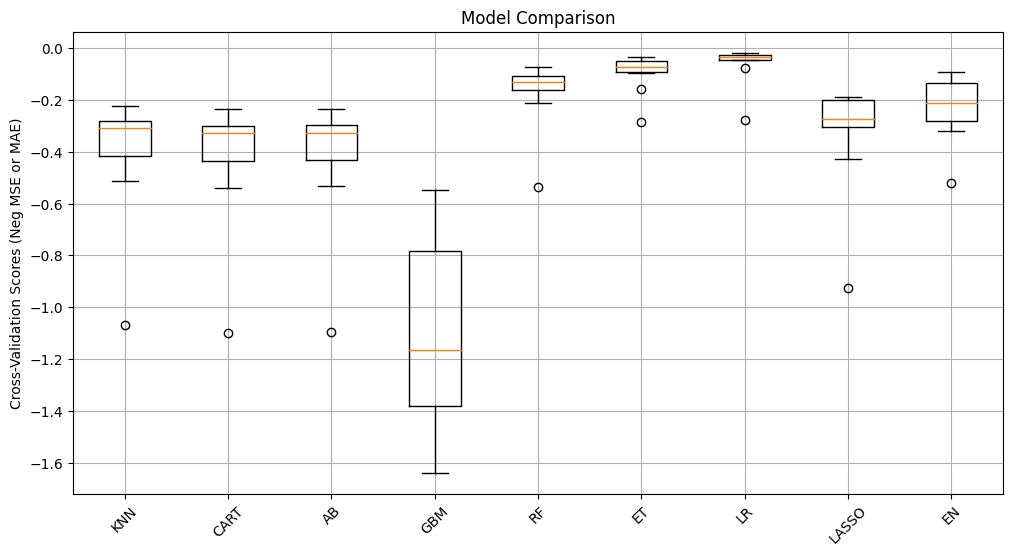

In [31]:
plt.figure(figsize=(12, 6))
plt.boxplot(all_results, labels=all_names, vert=True)
plt.title('Model Comparison')
plt.ylabel('Cross-Validation Scores (Neg MSE or MAE)')
plt.xticks(rotation=45)
plt.grid(True)


plt.show()

**Orange Line (Median)**: This represents the median score of the cross-validation results for each model.
**Box**: The box shows the interquartile range (IQR), which is the range between the 25th percentile (Q1) and 75th percentile (Q3) of the cross-validation scores.
**Whiskers**: These extend to the smallest and largest scores that are not outliers.
**Outliers (Dots)**: Points beyond the whiskers are considered outliers, indicating cross-validation results that deviate significantly from the rest.

# **NEURAL NETWORKS**

**MODEL 1**

In [34]:
model1 = Sequential([
    Dense(64, activation='relu',kernel_regularizer=l2(0.00001), input_shape=(xtrain.shape[1],)),
    Dropout(0.4),
   
    Dense(32, activation='relu',kernel_regularizer=l2(0.00001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model1.fit(xtrain, ytrain, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

Epoch 1/100


I0000 00:00:1734781600.339444     365 service.cc:145] XLA service 0x7b2878005a80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734781600.339498     365 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734781600.339502     365 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 122/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 28.3280 - mae: 3.8572

I0000 00:00:1734781602.415447     365 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.5988 - mae: 1.7659 - val_loss: 0.3575 - val_mae: 0.1843
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5111 - mae: 0.3313 - val_loss: 0.3201 - val_mae: 0.1744
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5689 - mae: 0.2412 - val_loss: 0.3120 - val_mae: 0.1301
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4636 - mae: 0.1796 - val_loss: 0.2741 - val_mae: 0.1265
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3957 - mae: 0.1652 - val_loss: 0.2588 - val_mae: 0.1170
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2463 - mae: 0.1404 - val_loss: 0.2299 - val_mae: 0.1326
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3225 - mae: 0.1434 - val_loss: 0.2330 - val_mae: 0.1117
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3227 - mae: 0.1331 - val_loss: 0.1874 - val_mae: 0.1058
Epoch 9/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2

In [35]:
loss, mae = model1.evaluate(xval, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1143 - mae: 0.0889
Test Loss: 0.1238
Test MAE: 0.0886


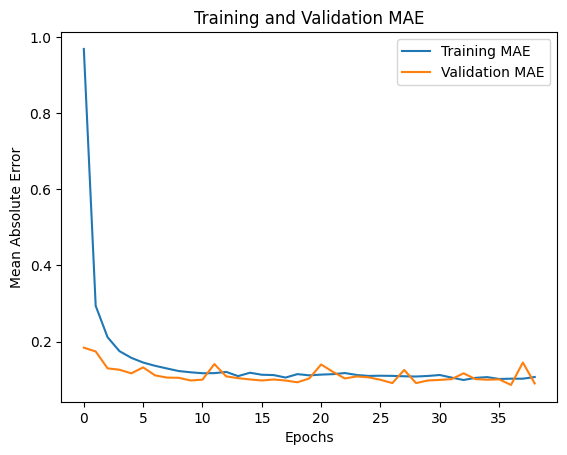

In [36]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

**MODEL 2**

In [37]:
model2 = Sequential([
    Dense(128, activation='relu',kernel_regularizer=l2(0.0001), input_shape=(xtrain.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu',kernel_regularizer=l2(0.0001)),
    Dropout(0.5),
    Dense(32, activation='relu',kernel_regularizer=l2(0.0001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history1 = model2.fit(xtrain, ytrain, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 26.6734 - mae: 2.7202 - val_loss: 0.5010 - val_mae: 0.1606
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5454 - mae: 0.2744 - val_loss: 0.4779 - val_mae: 0.1432
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3589 - mae: 0.1693 - val_loss: 0.4774 - val_mae: 0.1536
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4116 - mae: 0.1680 - val_loss: 0.4402 - val_mae: 0.1431
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5380 - mae: 0.1628 - val_loss: 0.4088 - val_mae: 0.1581
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3948 - mae: 0.1577 - val_loss: 0.3707 - val_mae: 0.1377
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4962 - mae: 0.1572 - val_loss: 0.3913 - val_mae: 0.1336
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4309 - mae: 0.1478 - val_loss: 0.3773 - val_mae: 0.1348
Epoch 9/100
1000/1000 ━━━━━━━━━

In [38]:
loss, mae = model2.evaluate(xval, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2473 - mae: 0.1220
Test Loss: 0.2637
Test MAE: 0.1218


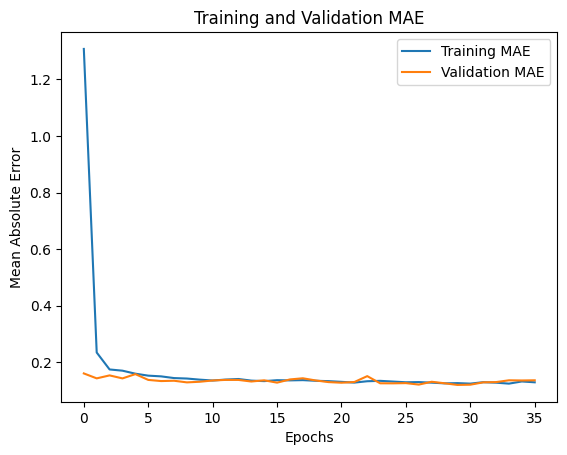

In [39]:
plt.plot(history1.history['mae'], label='Training MAE')
plt.plot(history1.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

**MODEL 3**

In [41]:
model3 = Sequential([
    Dense(64, activation='relu',kernel_regularizer=l2(0.001), input_shape=(xtrain.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history2 = model3.fit(xtrain, ytrain, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.1716 - mae: 1.5521 - val_loss: 0.4840 - val_mae: 0.1662
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4869 - mae: 0.1923 - val_loss: 0.4779 - val_mae: 0.1351
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4369 - mae: 0.1601 - val_loss: 0.4431 - val_mae: 0.1383
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4382 - mae: 0.1441 - val_loss: 0.3858 - val_mae: 0.1414
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4310 - mae: 0.1456 - val_loss: 0.4458 - val_mae: 0.1359
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4204 - mae: 0.1438 - val_loss: 0.4372 - val_mae: 0.1366
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4263 - mae: 0.1434 - val_loss: 0.3861 - val_mae: 0.1291
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2957 - mae: 0.1333 - val_loss: 0.4231 - val_mae: 0.1332
Epoch 9/100
1000/1000 ━━━━━━━━━━

In [42]:
loss, mae = model3.evaluate(xval, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1799 - mae: 0.1010
Test Loss: 0.1920
Test MAE: 0.1014


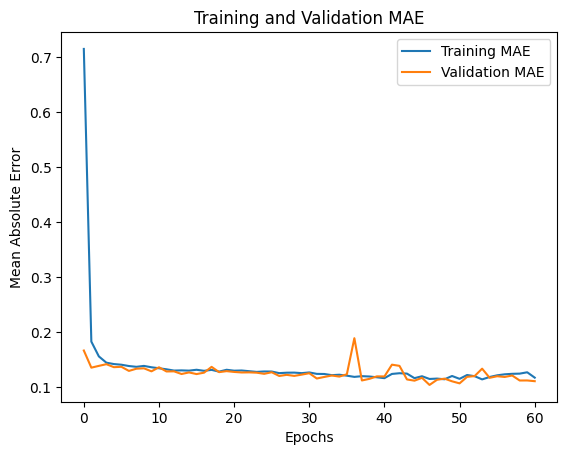

In [43]:
plt.plot(history2.history['mae'], label='Training MAE')
plt.plot(history2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

**MODEL 4**

In [44]:
model4 = Sequential([
    Dense(64, activation='relu',kernel_regularizer=l2(0.001), input_shape=(xtrain.shape[1],)),
    Dropout(0.2),
   
    Dense(32, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history3 = model4.fit(xtrain, ytrain, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.3082 - mae: 1.5582 - val_loss: 0.4228 - val_mae: 0.2035
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4364 - mae: 0.3056 - val_loss: 0.3770 - val_mae: 0.2039
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4213 - mae: 0.2343 - val_loss: 0.3241 - val_mae: 0.1493
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2913 - mae: 0.1871 - val_loss: 0.5248 - val_mae: 0.4505
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3539 - mae: 0.1943 - val_loss: 0.2825 - val_mae: 0.1348
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3456 - mae: 0.1710 - val_loss: 0.2962 - val_mae: 0.1350
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4795 - mae: 0.1720 - val_loss: 0.2606 - val_mae: 0.1588
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4603 - mae: 0.1589 - val_loss: 0.2374 - val_mae: 0.1160
Epoch 9/100
1000/1000 ━━━━━━━━━━

In [45]:
loss, mae = model4.evaluate(xval, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1654 - mae: 0.0888
Test Loss: 0.1798
Test MAE: 0.0885


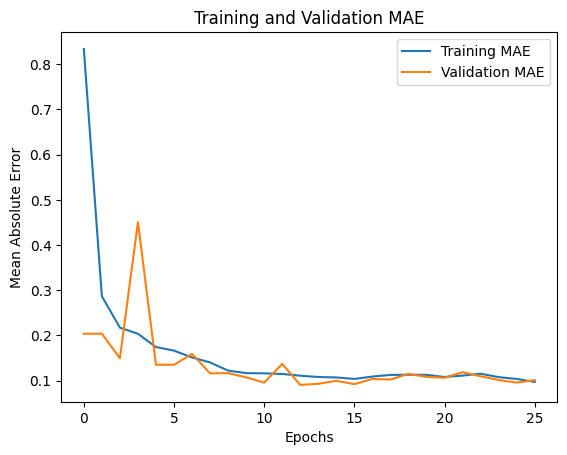

In [46]:
plt.plot(history3.history['mae'], label='Training MAE')
plt.plot(history3.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

In [47]:
print('MODEL 1')
loss, mae = model1.evaluate(xval, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')
print('-------------------------------------------------------------------------------------------------------------')
print('MODEL 2')
loss, mae = model2.evaluate(xval, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')
print('-------------------------------------------------------------------------------------------------------------')
print('MODEL 3')
loss, mae = model3.evaluate(xval, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')
print('-------------------------------------------------------------------------------------------------------------')
print('MODEL 4')
loss, mae = model4.evaluate(xval, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

MODEL 1
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1143 - mae: 0.0889
Test Loss: 0.1238
Test MAE: 0.0886
-------------------------------------------------------------------------------------------------------------
MODEL 2
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.2136 - mae: 0.1209
Test Loss: 0.2223
Test MAE: 0.1197
-------------------------------------------------------------------------------------------------------------
MODEL 3
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1799 - mae: 0.1010
Test Loss: 0.1920
Test MAE: 0.1014
-------------------------------------------------------------------------------------------------------------
MODEL 4
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1654 - mae: 0.0888
Test Loss: 0.1798
Test MAE: 0.0885


**MODEL 1** performs best amongst the 4 models.

# FINE TUNING ALGORITHMS AND ENSEMBLE METHODS

**Grid Search Parameter Tuning**  is an approach to parameter tuning that will methodically build and evaluate a
 model for each combination of algorithm parameters specified in a grid.

**K Neighbors Regressor**

In [50]:
 k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
 param_grid = dict(n_neighbors=k_values)
 model = KNeighborsRegressor()
 kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
 grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 grid_result = grid.fit(xtrain, ytrain)

 print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 means = grid_result.cv_results_['mean_test_score']
 stds = grid_result.cv_results_['std_test_score']
 params = grid_result.cv_results_['params']
 for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.311890 using {'n_neighbors': 21}
-0.523655 (0.303737) with: {'n_neighbors': 1}
-0.362941 (0.197630) with: {'n_neighbors': 3}
-0.328950 (0.210013) with: {'n_neighbors': 5}
-0.322147 (0.215009) with: {'n_neighbors': 7}
-0.321181 (0.209286) with: {'n_neighbors': 9}
-0.322379 (0.212628) with: {'n_neighbors': 11}
-0.321728 (0.216849) with: {'n_neighbors': 13}
-0.318225 (0.213076) with: {'n_neighbors': 15}
-0.316082 (0.207234) with: {'n_neighbors': 17}
-0.313233 (0.203480) with: {'n_neighbors': 19}
-0.311890 (0.205498) with: {'n_neighbors': 21}


**Random Forest Regressor**

In [53]:
 param_grid = dict(n_estimators=np.array([10,20,30,40,50,60,70,80,90,100]))
 model = RandomForestRegressor(random_state=seed)
 kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
 grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 grid_result = grid.fit(xtrain, ytrain)

 print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 means = grid_result.cv_results_['mean_test_score']
 stds = grid_result.cv_results_['std_test_score']
 params = grid_result.cv_results_['params']
 for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.090102 using {'n_estimators': 100}
-0.101337 (0.077061) with: {'n_estimators': 10}
-0.096080 (0.078255) with: {'n_estimators': 20}
-0.092343 (0.079402) with: {'n_estimators': 30}
-0.092939 (0.083828) with: {'n_estimators': 40}
-0.091527 (0.083092) with: {'n_estimators': 50}
-0.090817 (0.085479) with: {'n_estimators': 60}
-0.090579 (0.083710) with: {'n_estimators': 70}
-0.091253 (0.085632) with: {'n_estimators': 80}
-0.090932 (0.086683) with: {'n_estimators': 90}
-0.090102 (0.086466) with: {'n_estimators': 100}


**Extra trees Regressor**

In [55]:
 param_grid = dict(n_estimators=np.array([10,20,30,40,50,60,70,80,90,100]))
 model = ExtraTreesRegressor(random_state=seed)
 kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
 grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 grid_result = grid.fit(xtrain, ytrain)

 print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 means = grid_result.cv_results_['mean_test_score']
 stds = grid_result.cv_results_['std_test_score']
 params = grid_result.cv_results_['params']
 for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.048690 using {'n_estimators': 80}
-0.068603 (0.091120) with: {'n_estimators': 10}
-0.057137 (0.084200) with: {'n_estimators': 20}
-0.053579 (0.083554) with: {'n_estimators': 30}
-0.050755 (0.080883) with: {'n_estimators': 40}
-0.050084 (0.081301) with: {'n_estimators': 50}
-0.049809 (0.081030) with: {'n_estimators': 60}
-0.048755 (0.078787) with: {'n_estimators': 70}
-0.048690 (0.078293) with: {'n_estimators': 80}
-0.048890 (0.077747) with: {'n_estimators': 90}
-0.048784 (0.078374) with: {'n_estimators': 100}


**TEST WITH THE VALIDATION SET**

In [56]:
 model = RandomForestRegressor(random_state=seed, n_estimators=100)
 model.fit(xtrain, ytrain)
 predictions = model.predict(xval)
 print(mean_squared_error(yval, predictions))

0.08617539189634692


In [57]:
 model = ExtraTreesRegressor(random_state=seed, n_estimators=80)
 model.fit(xtrain, ytrain)
 predictions = model.predict(xval)
 print(mean_squared_error(yval, predictions))

0.033349343426023276


In [59]:
for name, model in models_linear:
    model.fit(xtrain, ytrain)
    predictions = model.predict(xval)
    mse = mean_squared_error(yval, predictions)
    mae = mean_absolute_error(yval, predictions)
    print(f"{name:<10}{mse:<20.4f}{mae:<20.4f}")

LR        0.4026              0.1843              
LASSO     0.4194              0.1581              
EN        0.4177              0.1681              


In [60]:
for name, model in models_nonlinear:
    model.fit(xtrain, ytrain)
    predictions = model.predict(xval)
    mse = mean_squared_error(yval, predictions)
    mae = mean_absolute_error(yval, predictions)
    print(f"{name:<10}{mse:<20.4f}{mae:<20.4f}")

KNN       0.3841              0.1237              
CART      0.1678              0.0581              


*Here K-neighbors regressor is before performing Parameter Tuning*

In [61]:
for name, model in ensembles:
    model.fit(xtrain, ytrain)
    predictions = model.predict(xval)
    mse = mean_squared_error(yval, predictions)
    mae = mean_absolute_error(yval, predictions)
    print(f"{name:<10}{mse:<20.4f}{mae:<20.4f}")

AB        0.8170              0.7704              
GBM       0.1547              0.0875              
RF        0.0880              0.0360              
ET        0.0559              0.0288              


*Here Random Forest Regressor and Extra Trees Regressor is before performing Parameter Tuning*

# CONCLUSION

**Extra Trees Regressor** performed the best followed by **Random Forest Regressor**. Both outperformed **Neural Network**.
Hence we choose ***Extra Trees Regressor*** as the model to be used.